# **Question 3**

## **Why imbalanced dataset is bad?**

### Let's answer it with an example:
### **The Accuracy Paradox**
### Suppose, you’re working on a bank fraud detection problem. In such problems, we generally observe that in every 100 samples claims 99 of them are non-fraudulent and 1 is fraudulent. So a binary classifier model need not be a complex model to predict all outcomes as 0 (meaning non-fraudulent) and achieve a great accuracy of 99%! Clearly, in such cases where class distribution is like that, the accuracy metric is not working and not preferable.

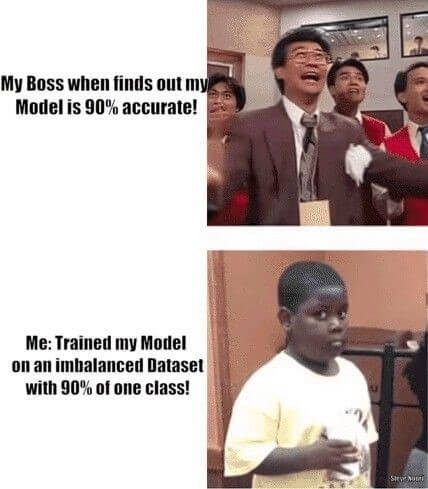

source: https://machinelearningmastery.com, smote-oversampling-for-imbalanced-classification/

## **Solving the problem by resampling**

### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are usually two types of methods for this:

### **1) Undersampling**

### **2) Oversampling**

### In most cases, oversampling is preferred over undersampling techniques.Because in undersampling we want to remove instances from data, but they may carrying some important information.
### Each of resampling method has many different types and here is an example of some ways to resampling:

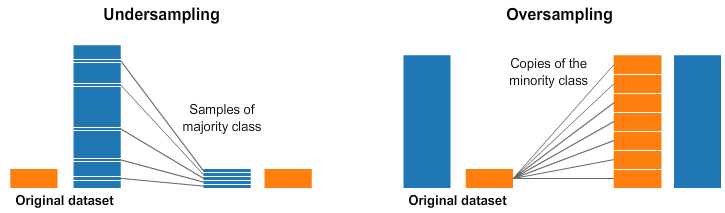

source: https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392

## **ٌWhat is Synthetic Minority Oversampling Technique (SMOTE)?**

### **SMOTE** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to solve the overfitting problem that occures by random oversampling. It focuses on the feature space to generate new instances between two instances that they are toghether

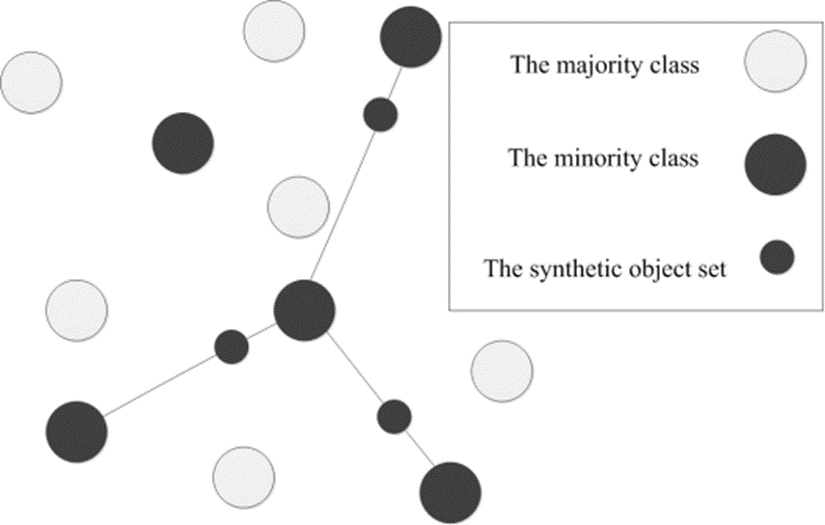

source : https://virgool.io, @payamsalimian.eng

## **SMOTE algorithm**

## **We will use an example to learn it:**
## **imagine we have 2 classes in our imbalanced dataset with 100 and 800 samples:**

### 1. At first we select that how many times we want to extend our minority class? It will be the parameter N
I want to build 7 times more samples of minority class to have equal classes (100 + (7*100) = 800) so we select N = 7

(we could want to reach unequal classes and like build just 5 times more samples, but I want to have equal classes).

### 2. Then the iteration starts by first selecting a minority class's instance randomly.
I named it X1.

### 3. Next, the KNN’s (K nearest neighbors) for that instance is obtained.
K is usually 5 but I select K = 8.

### 4. At last, to make N new samples, we repeat following steps, N times (N can be over K, It hasn't matter to have repeated selected samples):
In our example we have N = 7.

### 4.1. Randomly select one of KNN's of selected sample.
I named it X1i, and for first iteration we have X11

### 4.2. Calculate distance between selected sample and selected neighbor(actually every sample is a vector of features, so we are calculating two vectors's distance)
For first iteration we should calculate **X1 and X11** distance and I named it **diff**

### 4.3. Now, this difference is multiplied by any random value in (0,1] and is added to selected sample ( selected feature vector). The final feature vector is our new sample.
We named the random number **gap** and we named our new sample's feature vector **r1**

### 5. Then we repeat step 4 for each minority class's sample to generate a set of synthetic samples with N times more samples

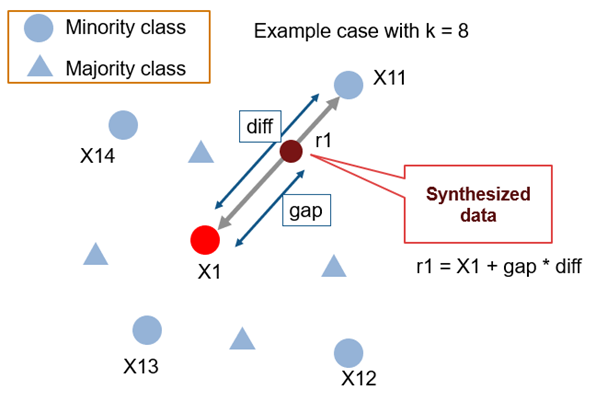

source: https://www.analyticsvidhya.com, overcoming-class-imbalance-using-smote-techniques/

### **We can briefly say the algorithm like this:**

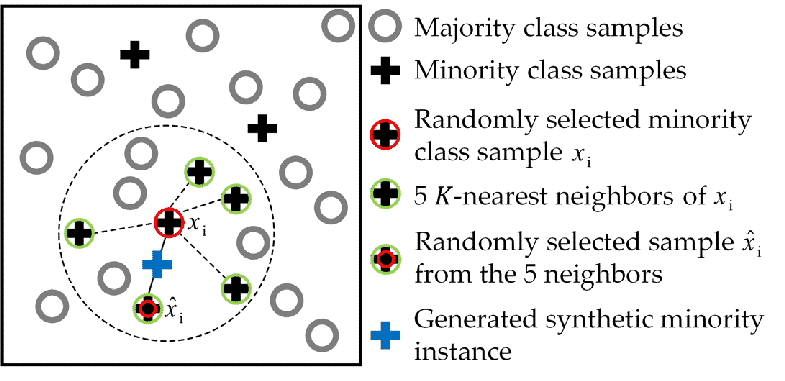

source: https://rikunert.com/smote_explained

## **SMOTE formula**

As we seen in last part, the main formula for creating new samples is this:

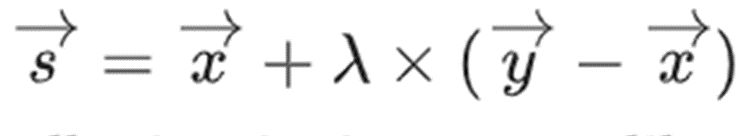

x = selected sample of minority class(its a vector because every sample is actually a vector of features)

λ = random number chosen between 0 and 1

y = selected neighbor from KNN's

s = final synthesized sample

source: https://link.springer.com, article/10.1007/s40747-021-00638-w

## **Advantages**

1. It improves the overfitting caused by random oversampling because synthetic examples are generated, not just a copy of existing examples.


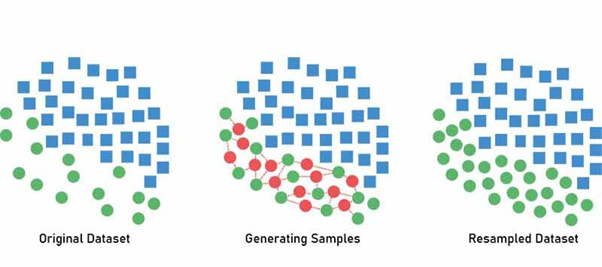

source: https://onlinebme.com, how-to-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

2. No loss of information because we are not undersampling

3. It’s simple

## **Disadvantages**

1. While generating synthetic examples, SMOTE does not take into consideration neighboring examples that can be from other classes. This can increase the overlapping of classes and can introduce additional noise.


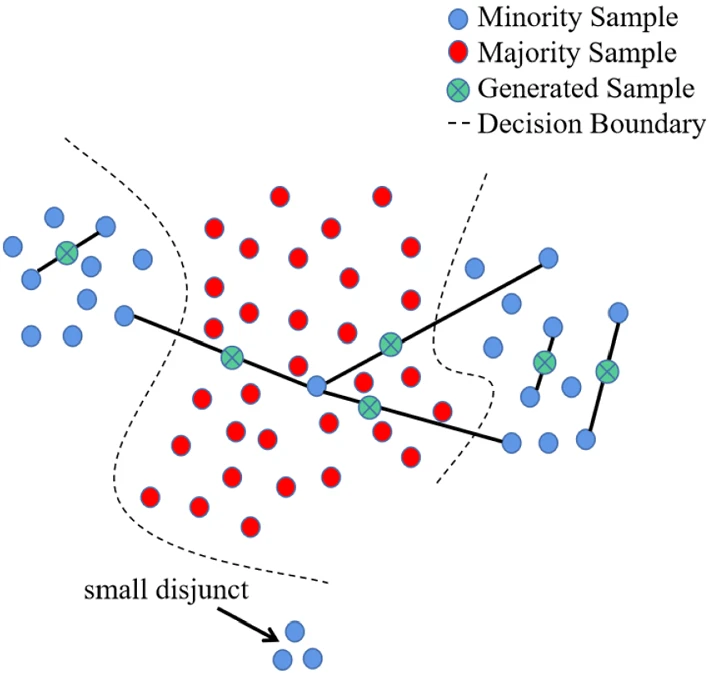

source: https://link.springer.com, article/10.1007/s40747-021-00638-w/figures/1

2. SMOTE is not very practical for high-dimensional data.

## **example using Python and TensorFlow**

I will use given dataset for Q4 also for this question, because its imbalanced, too.

We will use pandas and numpy library for working with dataset.

In [ ]:
import numpy as np
import pandas as pd

I uploaded dataset in my google drive with this directory:

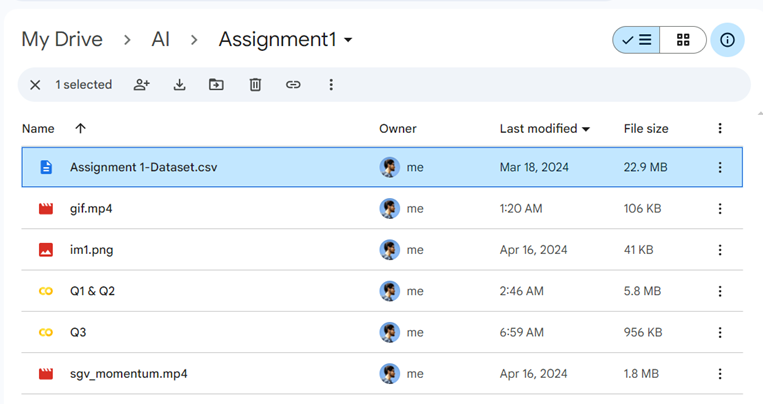

So I can get access to it by import colab, then mount my drive:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Now I can load uploaded dataset from my drive directory to pandas dataframe:

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/AI/Assignment1/Assignment 1-Dataset.csv")

We can check is that the right dataset by see it:

In [ ]:
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
0,1,7,2,29,2,6,0,0,0,81,...,0,66,6401,4,21.0,0,2,2,NaN,NaN
1,1,28,0,42,2,4,0,0,0,14,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
2,1,7,0,42,2,4,0,0,0,10,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
3,1,28,0,42,2,4,0,0,0,11,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
4,2,7,0,42,2,6,0,0,0,13,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111299,1,2,0,26,2,6,0,0,0,3,...,36,63,3454,0,18.0,36,1,2,NaN,NaN
111300,2,6,0,26,2,8,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN
111301,1,38,0,26,2,4,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN
111302,2,6,0,297,2,6,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN


column 93 & 94 haven't any information, so we drop them:

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 93', 'Unnamed: 94'])

now we have this:

In [ ]:
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F84,F85,F86,F87,F88,F89,F90,F91,F92,Target
0,1,7,2,29,2,6,0,0,0,81,...,4,21.0,0,66,6401,4,21.0,0,2,2
1,1,28,0,42,2,4,0,0,0,14,...,4,15.0,36,63,3413,4,15.0,36,1,2
2,1,7,0,42,2,4,0,0,0,10,...,4,15.0,36,63,3413,4,15.0,36,1,2
3,1,28,0,42,2,4,0,0,0,11,...,4,15.0,36,63,3413,4,15.0,36,1,2
4,2,7,0,42,2,6,0,0,0,13,...,4,15.0,36,63,3413,4,15.0,36,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111299,1,2,0,26,2,6,0,0,0,3,...,0,18.0,36,63,3454,0,18.0,36,1,2
111300,2,6,0,26,2,8,0,0,0,3,...,0,0.0,60,61,1404,0,0.0,60,1,2
111301,1,38,0,26,2,4,0,0,0,3,...,0,0.0,60,61,1404,0,0.0,60,1,2
111302,2,6,0,297,2,6,0,0,0,3,...,0,0.0,60,61,1404,0,0.0,60,1,2


### **Let's plot out dataset to have a before SMOTE plot**

We use pyplot from matplotlib to draw plots:

In [ ]:
import matplotlib.pyplot as plt

now we want frequency of each class Targets in dataset

In [ ]:
class_counts = dataset['Target'].value_counts()

And Plot the frequency using Matplotlib in a 4*4 figure and set its x and y labels and set a title for it and set red color for it

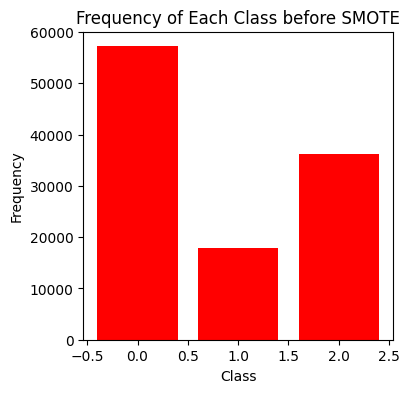

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(class_counts.index, class_counts.values, color='red')
plt.title('Frequency of Each Class before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

So we have an imbalanced dataset with this amount of datas:

In [ ]:
class_counts

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64

## **Let's go to train ANN without SMOT:**

At first we should separate 92 features from target column:

In [ ]:
y = dataset['Target']  # Target
X = dataset.drop(columns=['Target'])  # Features


Now we can see features and Target of each sample:

In [ ]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92
0,1,7,2,29,2,6,0,0,0,81,...,66,4,21.0,0,66,6401,4,21.0,0,2
1,1,28,0,42,2,4,0,0,0,14,...,63,4,15.0,36,63,3413,4,15.0,36,1
2,1,7,0,42,2,4,0,0,0,10,...,63,4,15.0,36,63,3413,4,15.0,36,1
3,1,28,0,42,2,4,0,0,0,11,...,63,4,15.0,36,63,3413,4,15.0,36,1
4,2,7,0,42,2,6,0,0,0,13,...,63,4,15.0,36,63,3413,4,15.0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111299,1,2,0,26,2,6,0,0,0,3,...,63,0,18.0,36,63,3454,0,18.0,36,1
111300,2,6,0,26,2,8,0,0,0,3,...,61,0,0.0,60,61,1404,0,0.0,60,1
111301,1,38,0,26,2,4,0,0,0,3,...,61,0,0.0,60,61,1404,0,0.0,60,1
111302,2,6,0,297,2,6,0,0,0,3,...,61,0,0.0,60,61,1404,0,0.0,60,1


In [ ]:
y

0         2
1         2
2         2
3         2
4         2
         ..
111299    2
111300    2
111301    2
111302    2
111303    2
Name: Target, Length: 111304, dtype: int64

We use scikit-learn library here for split dataset to train and test values:

In [ ]:
from sklearn.model_selection import train_test_split

It's better to split like this:

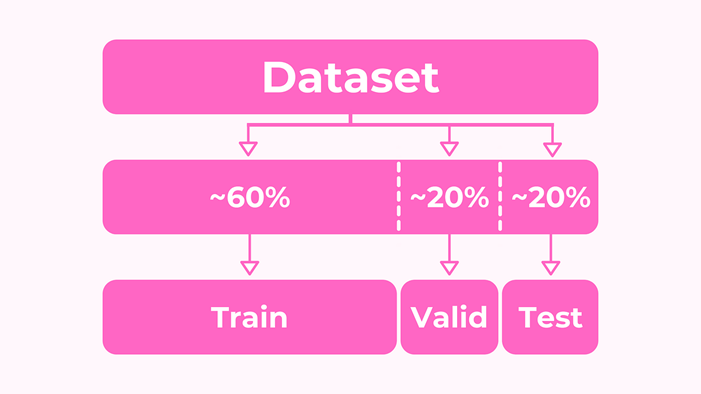

source: https://medium.com/@utkarsh.kant, how-to-split-your-dataset-into-train-test-and-validation-sets-17f40e98dfd0

So we use 20% of dataset for test , random_state arg Controls the shuffling applied to the data before applying the split. When we Pass an int, it means we want reproducible output across multiple function calls

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [42]:
X.shape, y.shape, X_train.shape,  y_train.shape, X_test.shape, y_test.shape , X_validation.shape  , y_validation.shape

((111304, 92),
 (111304,),
 (80138, 92),
 (80138,),
 (22261, 92),
 (22261,),
 (8905, 92),
 (8905,))

As you seen in dataset we had vary of feature values and it will gets us into trouble so we can scale our features and then we won't have a feature that become more important because of it's large value

we will use scikit-learn again and we will scale our train and test Xs.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_validation = scaler.fit_transform(X_validation)


**Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:**

mean = 0 (zero)

standard deviation = 1


Now we build new samples with SMOTE and then go and train two Samples:

we use fit_resample func of SMOTE class of imblearn.oversampling to build our new classes.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

scaler = MinMaxScaler()
X_smote = scaler.fit_transform(X_smote)


let's plot new x and y and compare with last plot:(I don't explain procedure because it's just like last plot)

In [ ]:
dataset_smote = pd.DataFrame(X_smote)
dataset_smote['Target'] = y_smote

class_counts_smote = dataset_smote['Target'].value_counts()

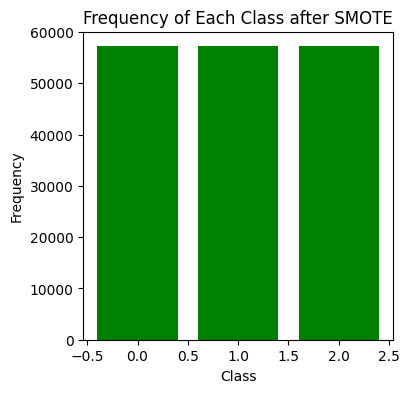

In [ ]:
plt.figure(figsize=(4, 4))
plt.bar(class_counts_smote.index, class_counts_smote.values, color='green')
plt.title('Frequency of Each Class after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

here is our smoted data:

In [ ]:
class_counts_smote

Target
2    57213
1    57213
0    57213
Name: count, dtype: int64

Now we build the models using tensorflow:

In [ ]:
import tensorflow.keras as k

We use keras sequential model(not functional model) in this problem:

In [ ]:
model = k.models.Sequential()

our input layer neurons should be equal to dataset samples features, lets find them:

In [ ]:
X_train.shape[1]

92

So we add the input layer with 92 neurons and then test some number of layers and neurons to find best ANN, and my hidden layers are with relu activation func because relu doesn't have Vanishing Gradient problem and it has so many advantages so it's suitable for this problem.
in last layer I have 3 neurons than shows our 3 classes and I use softmax activation func because its outputs are showing probability and its suitable for multi classes classification problems:

In [ ]:
model.add(k.layers.Dense(64, activation='relu', input_shape=(92,)))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(64, activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(64, activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(64, activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

# model.add(k.layers.Dense(32, activation='relu'))
# model.add(k.layers.BatchNormalization())
# model.add(k.layers.Dropout(0.5))

# Add the output layer
model.add(k.layers.Dense(3, activation='softmax'))


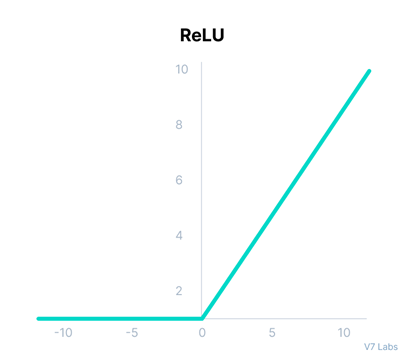

source: https://www.v7labs.com/blog/neural-networks-activation-functions

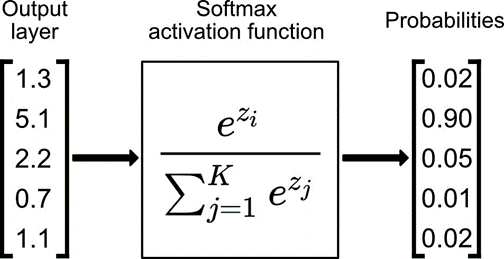

source: https://botpenguin.com/glossary/softmax-function

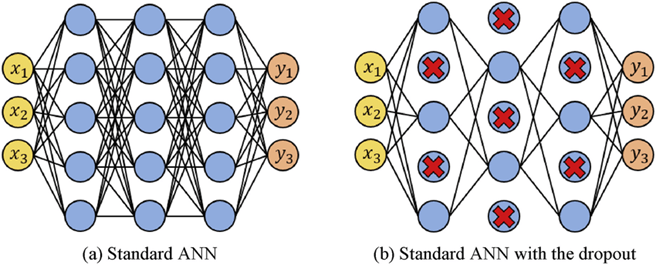

Source: https://www.researchgate.net/figure/Illustration-of-the-dropout_fig4_346346921

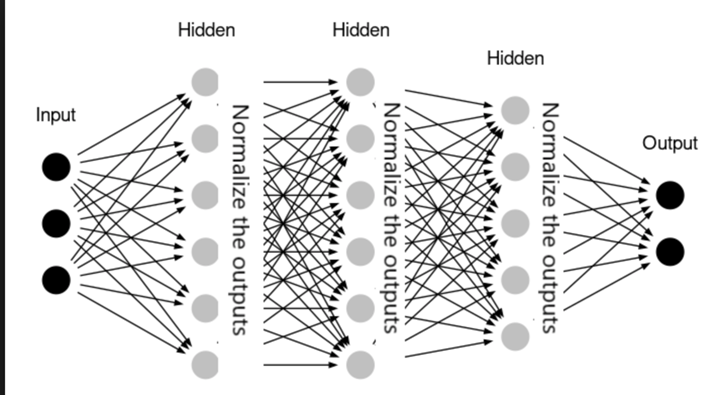

source: https://www.linkedin.com/pulse/why-do-we-use-batch-normalization-deep-learning-how-optimize-shah

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = model.fit(X_train, y_train, epochs=150, batch_size=350, validation_data = (X_validation, y_validation))


Epoch 1/150
229/229 [==============================] - 8s 8ms/step - loss: 1.2259 - accuracy: 0.4282 - val_loss: 0.9222 - val_accuracy: 0.5112
Epoch 2/150
229/229 [==============================] - 2s 7ms/step - loss: 0.9276 - accuracy: 0.5291 - val_loss: 0.8478 - val_accuracy: 0.5629
Epoch 3/150
229/229 [==============================] - 2s 7ms/step - loss: 0.8732 - accuracy: 0.5498 - val_loss: 0.8117 - val_accuracy: 0.5704
Epoch 4/150
229/229 [==============================] - 2s 7ms/step - loss: 0.8440 - accuracy: 0.5613 - val_loss: 0.7902 - val_accuracy: 0.5750
Epoch 5/150
229/229 [==============================] - 2s 7ms/step - loss: 0.8194 - accuracy: 0.5742 - val_loss: 0.7767 - val_accuracy: 0.6020
Epoch 6/150
229/229 [==============================] - 2s 9ms/step - loss: 0.8047 - accuracy: 0.5837 - val_loss: 0.7637 - val_accuracy: 0.5978
Epoch 7/150
229/229 [==============================] - 2s 9ms/step - loss: 0.7927 - accuracy: 0.5881 - val_loss: 0.7541 - val_accuracy: 0.6116

we should test our model too:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Our NN accuracy is:', accuracy)

696/696 [==============================] - 2s 3ms/step - loss: 0.6776 - accuracy: 0.6641
Our NN accuracy is: 0.6641210913658142


### NOW time to test SMOTE

In [ ]:
model_smote = k.models.Sequential()

In [ ]:
X_smote.shape[1]

92

In [ ]:
model_smote.add(k.layers.Dense(64, activation='relu', input_shape=(92,)))
model_smote.add(k.layers.BatchNormalization())
model_smote.add(k.layers.Dropout(0.5))

model_smote.add(k.layers.Dense(64, activation='relu'))
model_smote.add(k.layers.BatchNormalization())
model_smote.add(k.layers.Dropout(0.5))

model_smote.add(k.layers.Dense(64, activation='relu'))
model_smote.add(k.layers.BatchNormalization())
model_smote.add(k.layers.Dropout(0.5))

# model_smote.add(k.layers.Dense(32, activation='relu'))
# model_smote.add(k.layers.BatchNormalization())
# model_smote.add(k.layers.Dropout(0.1))

model_smote.add(k.layers.Dense(64, activation='relu'))
model_smote.add(k.layers.BatchNormalization())
model_smote.add(k.layers.Dropout(0.5))


# Add the output layer
model_smote.add(k.layers.Dense(3, activation='softmax'))

In [57]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)
X_smote_train, X_smote_validation, y_smote_train, y_smote_validation = train_test_split(X_smote_train, y_smote_train, test_size=0.1, random_state=42)


In [58]:
X_smote.shape, y_smote.shape, X_smote_train.shape,  y_smote_train.shape, X_smote_test.shape, y_smote_test.shape , X_smote_validation.shape  , y_smote_validation.shape

((171639, 92),
 (171639,),
 (123579, 92),
 (123579,),
 (34328, 92),
 (34328,),
 (13732, 92),
 (13732,))

In [59]:
model_smote.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist_smote = model_smote.fit(X_smote_train, y_smote_train, epochs=150, batch_size=250, validation_data= (X_smote_validation, y_smote_validation))
# loss_smote, accuracy_smote = model_smote.evaluate(X_test, y_test)
loss_smote, accuracy_smote = model_smote.evaluate(X_smote_test, y_smote_test)
print('Our NN accuracy for smoted sample is:', accuracy_smote)

Epoch 1/150
495/495 [==============================] - 6s 7ms/step - loss: 1.0307 - accuracy: 0.5066 - val_loss: 0.8122 - val_accuracy: 0.5958
Epoch 2/150
495/495 [==============================] - 4s 8ms/step - loss: 0.8308 - accuracy: 0.5859 - val_loss: 0.7610 - val_accuracy: 0.6245
Epoch 3/150
495/495 [==============================] - 4s 8ms/step - loss: 0.7950 - accuracy: 0.6100 - val_loss: 0.7322 - val_accuracy: 0.6388
Epoch 4/150
495/495 [==============================] - 3s 7ms/step - loss: 0.7733 - accuracy: 0.6222 - val_loss: 0.7062 - val_accuracy: 0.6546
Epoch 5/150
495/495 [==============================] - 3s 7ms/step - loss: 0.7585 - accuracy: 0.6293 - val_loss: 0.6923 - val_accuracy: 0.6654
Epoch 6/150
495/495 [==============================] - 4s 9ms/step - loss: 0.7455 - accuracy: 0.6375 - val_loss: 0.6808 - val_accuracy: 0.6753
Epoch 7/150
495/495 [==============================] - 3s 7ms/step - loss: 0.7324 - accuracy: 0.6433 - val_loss: 0.6685 - val_accuracy: 0.6686

and finally we have these results:

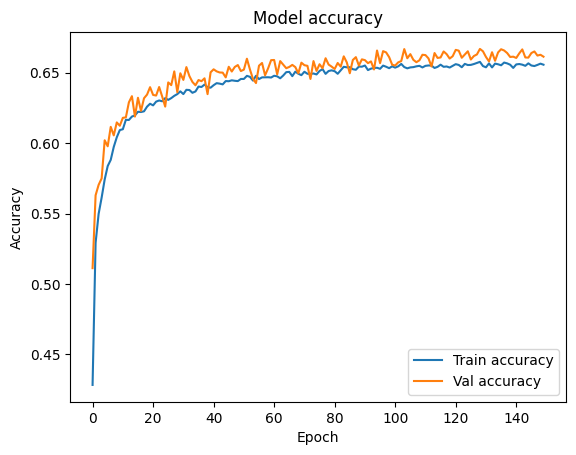

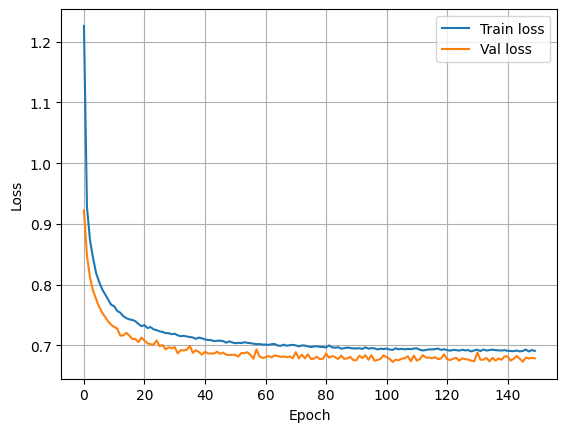

In [60]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

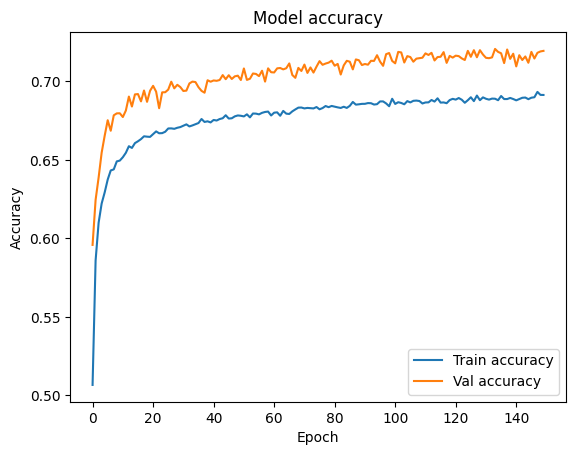

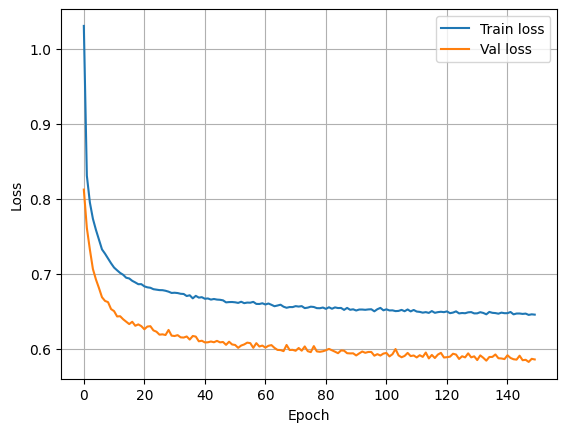

In [61]:
plt.plot(hist_smote.history['accuracy'])
plt.plot(hist_smote.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(hist_smote.history['loss'], label='Train loss')
plt.plot(hist_smote.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Maybe it seems that SMOTE doesn't works, but it is working, but just for probably noisy added samples, we can't bring accuraacy upper like regular form. but SMOTE actually does its work, because we will see that SMOTE model will be very better againt minority class, and that is actually what do we want:

first we want to determine the minority class:(idxmin finds index(class label) with minimun count)

In [ ]:
minority_class = dataset['Target'].value_counts().idxmin()


Now we should dilter Test Data and target labels for the Minority Class:

In [ ]:
X_test_minority = X_test[y_test == minority_class]
y_test_minority = y_test[y_test == minority_class]

Evaluate Models on Minority Class Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test_minority, y_test_minority)
loss_smote,accuracy_smote = model_smote.evaluate(X_test_minority, y_test_minority)
print(f"loss: {loss} and SMOTE loss: {loss_smote}")
print(f"accuracy: {accuracy} and SMOTE accuracy: {accuracy_smote}")